In [2]:
import numpy as np

In [3]:
a = np.array([1,2])

In [4]:
a

array([1, 2])

# sdf

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# sdfsdfsdf


In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

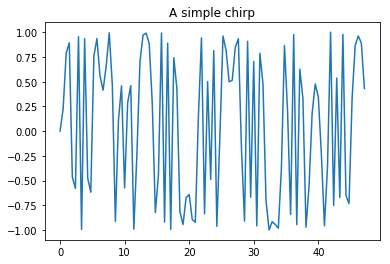

In [15]:
x = np.linspace(0, 15*np.pi, 100)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

# sdfsdf




In [1]:
# code from https://www.youtube.com/watch?v=c3tX_qReGIM
from vpython import *
 
#-----------------------------------------------------------------
# 그래픽 그려주는 코드
#------------------------------------------------------------------
 
# 화면 객체를 생성합니다. background 색과 카메라 center 포인트를 설정한다
#scene = display(background = (0,0,0), center = vector(0, -5, 0), range=(10,8,10))
 
# 2개의 물체를 생성합니다. 거리는 5m 간격으로 일정합니다
block1 = box(pos=vec(0,-5,0), size=vec(2,2,2), color=color.cyan, opacity=0.8)
block2 = box(pos=vec(0,-10,0), size=vec(2,2,2), color=color.cyan, opacity=0.8)
 
# 벽을 생성합니다
wall = box(pos=vec(0,0,0), size=vec(10,0.5,7))
 
# 스프링을 생성합니다
spring1 = helix(pos=wall.pos, radius=0.5, coils=8, thickness=0.1, color=color.gray(0.5))
spring2 = helix(pos=block1.pos,  radius=0.5, coils=8, thickness=0.1, color=color.gray(0.5))
 
m = 1    # 질량
k = 20   # 스프링 강성
 
y1 = 2   # 초기 위치
y2 = 0
 
v1 = 0   # 초기 속도
v2 = 0
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
#------------------------------------------------------------------
# 애니메이션 코드
#------------------------------------------------------------------
t = 0
dt = 0.01
 
# 텍스트를 표시할 라벨객체를 생성합니다
label1 = label()
label2 = label()
label3 = label()
 
while True:
    rate(100) # 100 Hz, 초당 100번씩 루프를 돌고 dt=0.01이므로 시간 t는 실제 시간과 일치합니다
    t += dt
 
    # 운동방정식을 통해 a1,a2를 구하고 v,y로 적분합니다
    a1 = k/m *(y2 - 2*y1)
    a2 = k/m *(-2*y2 + y1)
 
    v1 += a1*dt
    v2 += a2*dt
 
    y1 += v1*dt
    y2 += v2*dt
 
    # 블락의 실시간 위치를 업데이트합니다
    block1.pos.y = y1 - 5
    block2.pos.y = y2 - 10
 
    # 스프링 또한 블락과 같이 위치를 업데이트합니다
    # pos : 스프링 위쪽 좌표
    spring2.pos = block1.pos
    
    # axis : 스프링 아래쪽 좌표
    spring1.axis = block1.pos - wall.pos
    spring2.axis = block2.pos - block1.pos
 
    label1.pos = wall.pos + vector(0,0,0)
    label1.text = 'time : %.2f s' % t
    label2.pos = wall.pos + vector(0,1.5,0)
    label2.text = 'mass : %.2f kg' % m
    label3.pos = wall.pos + vector(0,3,0)
    label3.text = 'k : %.2f N/m' % k 


 


KeyboardInterrupt: 